In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

%matplotlib inline
plt.rcParams.update({'font.size': 14})

from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [65]:
DATA_FOLDER = '../data/'
DATA_NAME = 'PisoFirme_AEJPol-20070024_household.dta'

data = pd.read_stata(DATA_FOLDER + DATA_NAME)
balanced_data_1 = pd.read_csv(DATA_FOLDER + 'P3/matched_data_1.csv')
balanced_data_2 = pd.read_csv(DATA_FOLDER + 'P3/matched_data_2.csv')

In [67]:
def get_y(data1, data2, outcome):
    y = data1[[outcome]]-data2[[outcome]]
    return y

In [91]:
def get_X(data1, data2, outcome):
    data = pd.merge(data1[[outcome]], data2[[outcome]], left_index=True, right_index=True)
    return data

In [97]:
outcome = 'S_satislife'
X = get_X(balanced_data_1, balanced_data_2, outcome)
X.to_csv(DATA_FOLDER + 'P3/X_' + outcome + '.csv', index=False)

In [95]:
X.head()

,S_shcementfloor_x,S_shcementfloor_y
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


## Outcomes :
* S_shcementfloor : Share of rooms with cement floors
* S_cementfloorkit : Cement floor in kitchen
* S_cementfloordin : Cement floor in dining room
* S_cementfloorbat : Cement floor in bathroom
* S_cementfloorbed : Cement floor in bedroom

- S_satisfloor : Satisfaction with floor quality
- S_satishouse : Satisfaction with house quality
- S_satislife : Satisfaction with quality of life
- S_cesds : Depression scale (CES-D scale)
- S_pss : Percieved stress scale

## Amplification of Sensitivity Analysis

In [4]:
Gamma = 1.17
Lambda = np.linspace(1.2, 2.4, 50)
Delta = (1-Gamma*Lambda)/(Gamma - Lambda)

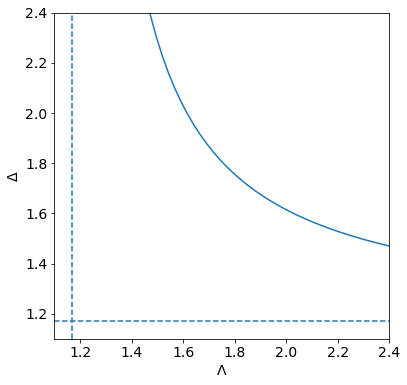

In [21]:
fig = plt.figure(figsize=(6,6))
plt.plot(Lambda, Delta)
plt.axvline(x=1.17, ls='--', color='tab:blue')
plt.axhline(y=1.17, ls='--', color='tab:blue')
plt.xlim([1.1, 2.4])
plt.ylim([1.1, 2.4])
plt.xlabel('$\Lambda$')
plt.ylabel('$\Delta$')
plt.show()